### Imports

In [1]:
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from collections import Counter
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

### Constants

In [2]:
SUBMISSIONS_DATA = "../data/submissions.csv" 
COMMENTS_DATA = "../data/top_comments_50000_100.csv"
nltk.download("punkt")
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Functions

In [3]:
# def get_higest_tfidf_words(comments, n=25, remove_stop=True, **kwargs):
#     stop_words = "english" if remove_stop else None
#     vectoriser = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, **kwargs)
#     tfidf = vectoriser.fit_transform(comments)

#     feature_names = np.array(vectoriser.get_feature_names_out())
#     tfidf_scores = np.asarray(tfidf.sum(axis=0)).ravel()
#     word_scores = dict(zip(feature_names, tfidf_scores))
#     word_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

#     return word_scores[:n]

def create_wordcloud(comments):
    wc = WordCloud(background_color='white').generate(" ".join(comments))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def get_most_common_words(comments, n=25, remove_stop=True):
    tokens = [
        word 
        for word in " ".join(comments).split()
        if remove_stop and word not in STOPWORDS
    ]
    return Counter(tokens).most_common(n)

### Load Data

In [4]:
submissions = pd.read_csv(SUBMISSIONS_DATA)
print(submissions.shape)
submissions.head()

(318498, 13)


C:\Users\Rory\AppData\Local\Temp\ipykernel_9284\2384065944.py:1: DtypeWarning: Columns (0,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions = pd.read_csv(SUBMISSIONS_DATA)


,name,author,title,created_utc,score,is_self,over_18,selftext,is_video,is_reddit_media_domain,is_gallery,domain,url
0,t3_33fxn6,[deleted],Do your worst!,1429678694,2,False,True,NaN,NaN,NaN,NaN,imgur.com,https://i.imgur.com/WuVB0FT.jpg
1,t3_33iz0o,SwagmasterEDP,do your worst!,1429740688,38,False,False,NaN,NaN,NaN,NaN,imgur.com,https://i.imgur.com/lg4GoAs.jpg
2,t3_33j2l2,[deleted],/u/Tyoko,1429742238,3,False,False,NaN,NaN,NaN,NaN,imgur.com,https://i.imgur.com/VJ2TVZC.jpg
3,t3_3bti9n,[deleted],Not saying if I'm the fish or the guy.,1435798027,209,False,False,NaN,NaN,NaN,NaN,i.imgur.com,http://i.imgur.com/zkjSV0D.jpg
4,t3_3btkg6,Tyrosoldier,roast me you betafucks,1435799165,16,False,False,NaN,NaN,NaN,NaN,i.imgur.com,http://i.imgur.com/bbqZD0B.jpg


In [5]:
comments = pd.read_csv(COMMENTS_DATA)
print(comments.shape)
comments.head()

(36898, 9)


,id,author,created_utc,parent_id,link_id,score,controversiality,is_submitter,body
0,cspcsxv,Tyrosoldier,1435798221,t3_3bti9n,t3_3bti9n,661,0,NaN,dis nigga look like the penguin
1,cspd39z,SwagmasterEDP,1435798735,t3_3bti9n,t3_3bti9n,149,0,NaN,the next thing you should catch is a dentist
2,cspd9af,RimJobRhinoceros,1435799040,t3_3bti9n,t3_3bti9n,132,0,NaN,I love seeing people with down syndrome so hap...
3,cspe2vi,SwagmasterEDP,1435800586,t3_3btn16,t3_3btn16,687,0,NaN,I think your barber already did.
4,cspe6c0,lolwtface,1435800769,t3_3btn16,t3_3btn16,347,0,NaN,You look like you got paid to hold a dudes loa...


### Comments EDA

#### Time Posted

<Axes: >

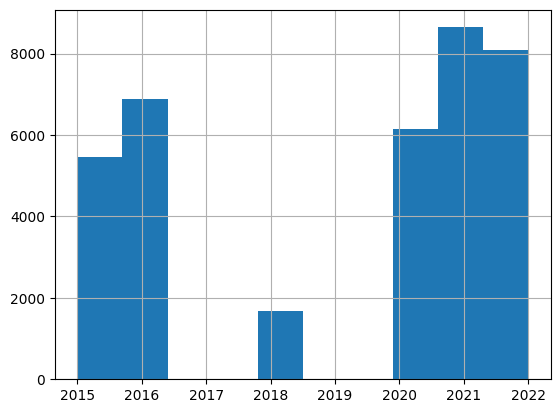

In [6]:
pd.to_datetime(comments.created_utc, utc=True, unit="s").dt.year.hist()

#### Commnets per Post

count    7781.000000
mean        4.742064
std         5.057857
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max        42.000000
Name: count, dtype: float64


<Axes: >

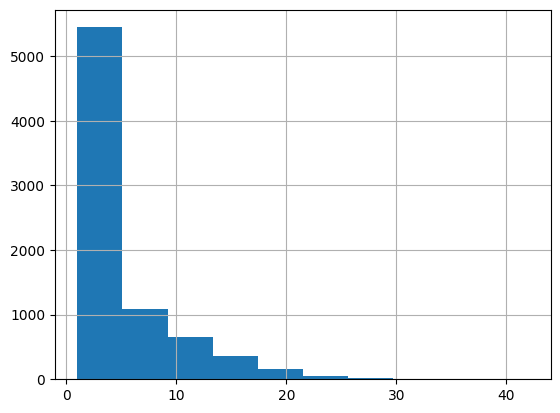

In [7]:
comments_per_post = comments.parent_id.value_counts()
print(comments_per_post.describe())
comments_per_post.hist()

#### Most Active Poster

In [8]:
print(comments[comments.author != "[deleted]"].author.value_counts().describe())
comments.author.value_counts()[:20]

count    20780.000000
mean         1.709721
std          4.244688
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        321.000000
Name: count, dtype: float64


author
[deleted]               1370
Pick_Locks_Get_Money     321
ReillyDiefenbach         274
Absolutely_Coffee        160
49Gold                   111
VaultVeteran             103
DoorjammerCrow            94
DeathSpiral321            94
lostmyshoes01             68
NorthBandit88             67
DJBo2112                  65
A-A-Ronhiphop             61
AriMeowber                54
toothscrew                52
DelverOfSeacrest          51
thedeuce75                49
overimportance            48
Thanks-Feeling            47
HarryCallahan19           47
Contrarian_Eh             46
Name: count, dtype: int64

#### Scores

count    36898.000000
mean       648.140983
std       1271.579467
min        100.000000
25%        145.000000
50%        247.000000
75%        574.000000
max      29739.000000
Name: score, dtype: float64


<Axes: >

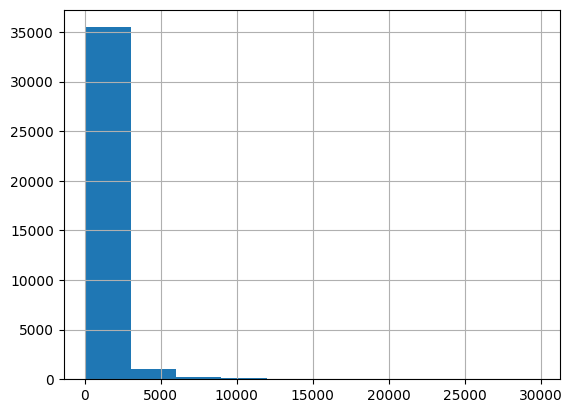

In [9]:
print(comments.score.describe())
comments.score.hist()

In [10]:
comments.sort_values("score", ascending=False)[["body", "score", "parent_id"]][:10]

,body,score,parent_id
14435,Bro what happened,29739,t3_gm4wy7
14652,Got your mom’s titties and your dad’s face.,24517,t3_gu5mlk
20680,You definitely skip face day,22718,t3_l28sih
16796,Are you and your girlfriend the same person?,22297,t3_idvh7v
21380,Went from Pam Anderson to Louie Anderson and a...,21302,t3_loxfjl
14385,Which sword do you use to cut your shits up so...,21242,t3_gkmcol
14426,Your dad had to roofie your mom just so you co...,21044,t3_gm4wy7
16251,"Everything about you says... ""Blow it on my ti...",20162,t3_i51qm0
11308,Do you really need three clocks to let you kno...,19099,t3_5dke49
21154,Wii Fit,19004,t3_likem0


In [11]:
print(comments.controversiality.describe())

count    36898.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: controversiality, dtype: float64


#### Word Count

In [12]:
comments["body_lower"] = comments.body.apply(lambda body: body.lower())
comments["tokens"] = comments.body_lower.apply(lambda body: word_tokenize(body))
comments.head()

,id,author,created_utc,parent_id,link_id,score,controversiality,is_submitter,body,body_lower,tokens
0,cspcsxv,Tyrosoldier,1435798221,t3_3bti9n,t3_3bti9n,661,0,NaN,dis nigga look like the penguin,dis nigga look like the penguin,"[dis, nigga, look, like, the, penguin]"
1,cspd39z,SwagmasterEDP,1435798735,t3_3bti9n,t3_3bti9n,149,0,NaN,the next thing you should catch is a dentist,the next thing you should catch is a dentist,"[the, next, thing, you, should, catch, is, a, ..."
2,cspd9af,RimJobRhinoceros,1435799040,t3_3bti9n,t3_3bti9n,132,0,NaN,I love seeing people with down syndrome so hap...,i love seeing people with down syndrome so hap...,"[i, love, seeing, people, with, down, syndrome..."
3,cspe2vi,SwagmasterEDP,1435800586,t3_3btn16,t3_3btn16,687,0,NaN,I think your barber already did.,i think your barber already did.,"[i, think, your, barber, already, did, .]"
4,cspe6c0,lolwtface,1435800769,t3_3btn16,t3_3btn16,347,0,NaN,You look like you got paid to hold a dudes loa...,you look like you got paid to hold a dudes loa...,"[you, look, like, you, got, paid, to, hold, a,..."


count    36898.000000
mean        15.670714
std         17.291167
min          1.000000
25%          9.000000
50%         13.000000
75%         18.000000
max        797.000000
Name: word_count, dtype: float64


<Axes: >

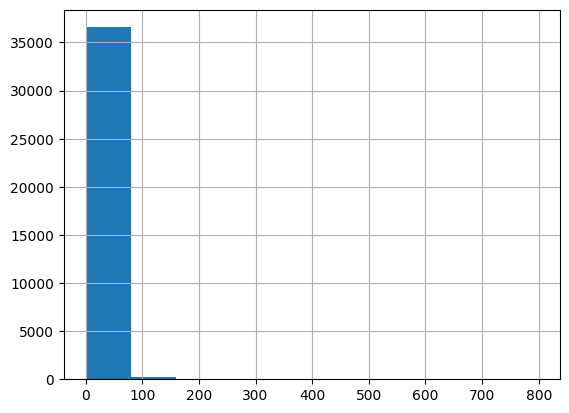

In [13]:
comments["word_count"] = comments.tokens.apply(len)
print(comments.word_count.describe())
comments.word_count.hist()

#### Common Words

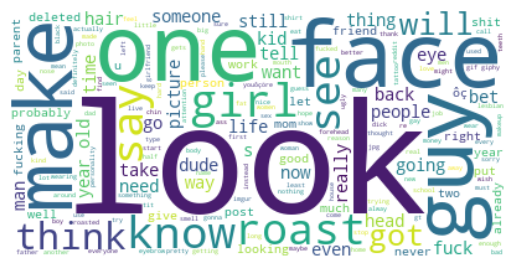

In [14]:
create_wordcloud(comments.body_lower)

In [15]:
get_most_common_words(comments.body_lower)

[('like', 8247),
 ('look', 5782),
 ('get', 1682),
 ('looks', 1665),
 ('one', 1509),
 ('face', 1239),
 ('would', 1215),
 ('make', 1018),
 ('know', 969),
 ("i'm", 902),
 ('you.', 875),
 ('got', 873),
 ('see', 830),
 ('even', 786),
 ('think', 775),
 ('guy', 758),
 ('people', 749),
 ('old', 724),
 ('could', 723),
 ('still', 720),
 ('hair', 714),
 ('going', 713),
 ('girl', 710),
 ('roast', 664),
 ('someone', 660)]

In [16]:
most_common_1_word = get_most_common_words(comments[comments.word_count == 1].body_lower, n=7)
most_common_1_word

[('feminem', 5),
 ('r/dontputyourdickinthat', 4),
 ('pass', 2),
 ('r/13or30', 2),
 ('onlyrefunds', 2),
 ('onlymans', 2),
 ('/r/punchablefaces', 1)]

Check if these 1 liners are being made the same person

In [17]:
comments[comments.body_lower.isin([word for word, _ in most_common_1_word])] .groupby(["body", "author"]).size()

body                     author         
Feminem                  G-Skillz85         1
                         N3ONKATMAN         1
                         SnixPlaysAlot      1
                         samx3i             1
                         upchuckle          1
OnlyMans                 MrJack12345        1
                         blondart           1
OnlyRefunds              SmellPoop          1
                         love2kick          1
Pass                     Shlopcakes         1
pass                     mayur2204          1
r/13or30                 DocHoliday79       1
                         Worthless_Sheep    1
r/dontputyourdickinthat  DickyMcGrumpy      1
                         ShadowCetra        1
                         [deleted]          1
                         harzivall          1
dtype: int64

In [18]:
comments.body_lower.value_counts()[:50]

body_lower
[deleted]                                        479
[removed]                                        161
why the long face?                                12
shut up meg                                        7
molly ringworm                                     5
carrot bottom                                      5
ellen degenerate                                   5
feminem                                            5
trailer swift                                      5
![gif](giphy|ayjfdmmgs7oku)                        5
if mlk had a nightmare                             5
zz bottom                                          5
machine gun smelly                                 5
![gif](giphy|3rdnnpumx7tya)                        4
![gif](giphy|5yhffufq6ztry|downsized)              4
![gif](giphy|u3fkqnnkwvvdk)                        4
r/dontputyourdickinthat                            4
post alone                                         4
shut up meg.                       

In [19]:
remove_punc = lambda body: body.translate(str.maketrans('', '', string.punctuation))
comments.body_lower.apply(remove_punc).value_counts()[:20]

body_lower
deleted                     479
removed                     161
shut up meg                  18
why the long face            14
zz bottom                     7
carrot bottom                 7
trailer swift                 7
the unfuckables               6
i can smell this picture      6
ellen degenerate              6
molly ringworm                6
feminem                       5
post alone                    5
jabba the slut                5
gifgiphyayjfdmmgs7oku         5
machine gun smelly            5
if mlk had a nightmare        5
rdontputyourdickinthat        4
gifgiphy3rdnnpumx7tya         4
breaking sad                  4
Name: count, dtype: int64

### Submissions EDA

#### Time Posted

<Axes: >

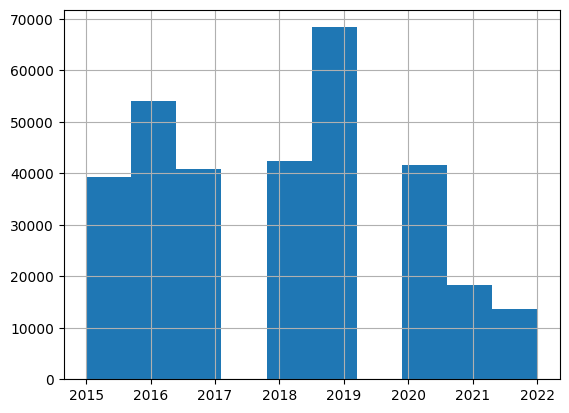

In [20]:
pd.to_datetime(submissions.created_utc, utc=True, unit="s").dt.year.hist()

#### Most Active Poster

In [21]:
print(submissions[submissions.author != "[deleted]"].author.value_counts().describe())
submissions.author.value_counts()[:20]

count    202379.000000
mean          1.444888
std           1.400073
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         373.000000
Name: count, dtype: float64


author
[deleted]             26083
icrispyKing             373
Ford456fgfd              67
chsmicroaggression       48
kmcc93                   47
Henry_Lanier             43
KKHFan                   38
Roastme42                36
RandomMastermind         34
Xx-BrotatoeChip-xX       31
DoranSpaghetti           29
PenisyWolf               27
MidTierHero              25
Jayvinredieske           24
Cmonty87                 23
ClkeOG                   22
jcannon46609             22
Superhermansmith         22
Notracistkkk             22
Getshwifty15             22
Name: count, dtype: int64

#### Duplicated posts

In [22]:
dup_urls = submissions.url.value_counts()
print(f"{len(dup_urls[dup_urls > 1])} Duplicated URLS")
dup_urls[:10]

2354 Duplicated URLS


url
https://i.imgur.com/gallery/wTjucVe.jpg    14
https://i.imgur.com/nDcSMCw.jpg             9
https://i.imgur.com/BBhBJxR.jpg             8
https://i.imgur.com/edit.jpg                7
https://i.imgur.com.jpg                     7
https://i.imgur.com/gallery/C1XTlSB.jpg     6
https://i.imgur.com/HLTEX9b.jpg             5
https://i.imgur.com/4IMYNt3.mp4             5
https://i.imgur.com/gallery/3XkxmOv.jpg     5
http://i.imgur.com/MQfW8Qq.jpg?1            5
Name: count, dtype: int64

##### Duplicate URL posts by differnt users

In [23]:
no_deleted = submissions[submissions.author != "[deleted]"]
dup_url_users = no_deleted.groupby("url").author.nunique().gt(1)
dup_url_users_result = no_deleted.loc[no_deleted.url.isin(dup_url_users[dup_url_users].index)]
print(len(dup_url_users_result))
dup_url_users_result[:20]

427


,name,author,title,created_utc,score,is_self,over_18,selftext,is_video,is_reddit_media_domain,is_gallery,domain,url
2663,t3_3ha1a1,ThisIsUrCaptain,"At a party, make us hate ourselves!",1439786037,126,False,False,NaN,NaN,NaN,NaN,imgur.com,https://i.imgur.com/gwbaXp4.jpg
4442,t3_3hmch6,fire_dick_trident,"Roast me, I'm feeling quite chilly.",1440011122,4,False,False,NaN,NaN,NaN,NaN,i.imgur.com,http://i.imgur.com/E3LozQk.jpg
4682,t3_3hn5t2,scott-treloar,Roast me like you roast your chicken,1440022668,1,False,False,NaN,NaN,NaN,NaN,m.imgur.com,http://m.imgur.com/upload
5686,t3_3hs92w,jrdidriks,Ready for Roasting,1440114597,2,False,False,NaN,NaN,NaN,NaN,imgur.com,https://i.imgur.com/edit.jpg
10069,t3_3isrci,bowers32,16 got a beard and weigh 250 what do you got,1440811869,1,False,False,NaN,NaN,NaN,NaN,imgur.com,https://i.imgur.com.jpg
14771,t3_3kxoun,SaltySilverMan,I am a former minecraft pro roste me,1442252770,19,False,False,NaN,NaN,NaN,NaN,i.imgur.com,http://i.imgur.com/UvXSBp7.jpg?1
14772,t3_3kxphq,Yukitano,I go home and masturbate to roblox porn,1442253026,1,False,False,NaN,NaN,NaN,NaN,i.imgur.com,http://i.imgur.com/UvXSBp7.jpg?1
16996,t3_3m08d9,Yolomonster3,Roast me so hard that I wake up as a piece of ham,1442968437,1,False,False,NaN,NaN,NaN,NaN,imgur.com,https://i.imgur.com.jpg
21488,t3_3onwht,Pilgrim444,Roast this Lad (He likes Team fortress 2 and c...,1444785387,4,False,False,NaN,NaN,NaN,NaN,imgur.com,https://i.imgur.com/ST3nJ1f.jpg
22845,t3_3psaht,TwistedDemon,Ruin his Life... He wants no mercy,1445528701,9,False,False,NaN,NaN,NaN,NaN,imgur.com,https://i.imgur.com/NnKoFJq.jpg


In [24]:
dup_posts = submissions.groupby(["title", "url"]).size().sort_values(ascending=False)
print(f"{len(dup_posts[dup_posts > 1])} Duplicated Posts")
dup_posts[:10]

565 Duplicated Posts


title                                                                                                                 url                                    
My dad beat me up because I was to late for the friday prayers. Go hard on me like the turks did on the armenians 🇹🇷  https://i.imgur.com/BBhBJxR.jpg            8
Fuck me up                                                                                                            https://i.redd.it/vodr2j0qesi41.jpg        4
I dare you to try make me cry                                                                                         https://i.redd.it/370dbj69ai631.jpg        4
roast me dont hold back!                                                                                              https://i.imgur.com/gallery/C1XTlSB.jpg    4
I lost my fantasy league and this is my punishment so roast me                                                        https://i.imgur.com/a/uHE1Bxz.jpg          3
3.2 million karma and accep

#### Scores

In [25]:
print(submissions.score.describe())

count    318498.000000
mean         74.702959
std         976.410505
min           0.000000
25%           1.000000
50%           1.000000
75%           6.000000
max       85974.000000
Name: score, dtype: float64


In [26]:
top_post = submissions.loc[submissions.score.argmax()]
print(top_post.title)
print(top_post.author)
print(top_post.url)

Thank you for all the support! Seeing complete strangers care about my situation really warmed my heart.
MufasaQuePasa
https://i.redd.it/s2fi2wr7ibe21.jpg


In [27]:
submissions[submissions.author == "MufasaQuePasa"]

,name,author,title,created_utc,score,is_self,over_18,selftext,is_video,is_reddit_media_domain,is_gallery,domain,url
185240,NaN,MufasaQuePasa,17 years old russian with crippling depression...,1548929668,58640,False,False,NaN,False,True,NaN,i.redd.it,https://i.redd.it/oln5unjmhqd21.jpg
186200,NaN,MufasaQuePasa,Thank you for all the support! Seeing complete...,1549184110,85974,False,False,NaN,False,True,NaN,i.redd.it,https://i.redd.it/s2fi2wr7ibe21.jpg


count     7781.000000
mean      1242.568307
std       3416.033696
min          0.000000
25%         59.000000
50%        134.000000
75%        587.000000
max      44042.000000
Name: score, dtype: float64


<Axes: >

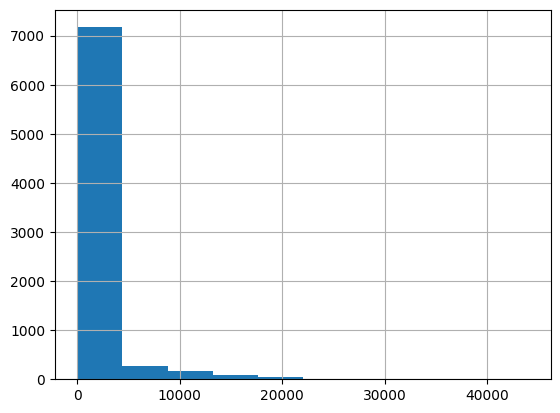

In [28]:
selected_posts = submissions[submissions.name.isin(comments.parent_id)]
print(selected_posts.score.describe())
selected_posts.score.hist()

In [29]:
selected_posts.iloc[selected_posts.score.argmax()]

name                                                              t3_ko0qut
author                                                          icrispyKing
title                     I've been roasted on this sub every single day...
created_utc                                                      1609458190
score                                                                 44042
is_self                                                               False
over_18                                                               False
selftext                                                                NaN
is_video                                                              False
is_reddit_media_domain                                                 True
is_gallery                                                              NaN
domain                                                            i.redd.it
url                                     https://i.redd.it/hz6861u8vl861.jpg
Name: 286503

In [30]:
selected_posts.iloc[selected_posts.score.argmin()].url

'https://i.reddituploads.com/4862c9690c6340e09d069fe83ae07a51?fit=max&amp;h=1536&amp;w=1536&amp;s=6cf98e159b9d0d54422a495489491732'

In [31]:
comments[comments.parent_id == selected_posts.iloc[selected_posts.score.argmin()]["name"]]

,id,author,created_utc,parent_id,link_id,score,controversiality,is_submitter,body,body_lower,tokens,word_count
9835,d77i36k,a_homosexual,1472864680,t3_50wcws,t3_50wcws,556,0,NaN,Get your shit off that guy's car.,get your shit off that guy's car.,"[get, your, shit, off, that, guy, 's, car, .]",9
9836,d77i9ug,daeqsw,1472865014,t3_50wcws,t3_50wcws,227,0,NaN,My name is Brock Turner.\nI am a rapist.,my name is brock turner.\ni am a rapist.,"[my, name, is, brock, turner, ., i, am, a, rap...",11
9838,d77ipil,Throwrrrowrrowurboat,1472865809,t3_50wcws,t3_50wcws,106,0,NaN,Are you headed there to deliver the pizza she ...,are you headed there to deliver the pizza she ...,"[are, you, headed, there, to, deliver, the, pi...",26
9840,d77kpwe,IBelieveInKanyeWest,1472869557,t3_50wcws,t3_50wcws,255,0,NaN,"Oh cool, I finally get to meet her gay friend.","oh cool, i finally get to meet her gay friend.","[oh, cool, ,, i, finally, get, to, meet, her, ...",12
9841,d77kvhq,roastface,1472869854,t3_50wcws,t3_50wcws,133,0,NaN,Damn. Your moms bought you a sweet ride!,damn. your moms bought you a sweet ride!,"[damn, ., your, moms, bought, you, a, sweet, r...",10
9843,d77l7rl,moemoe7012,1472870499,t3_50wcws,t3_50wcws,223,0,NaN,**D**o y**OU** **CH**oose to be on**E**?,**d**o y**ou** **ch**oose to be on**e**?,"[*, *, d, *, *, o, y, *, *, ou, *, *, *, *, ch...",27
9844,d77lc55,Tourettes_and_Coffee,1472870734,t3_50wcws,t3_50wcws,394,0,NaN,You look like you watch a lot of wrestling but...,you look like you watch a lot of wrestling but...,"[you, look, like, you, watch, a, lot, of, wres...",26
9845,d77lh25,[deleted],1472870998,t3_50wcws,t3_50wcws,178,0,NaN,"Eminem's retarded younger brother, Eerminem","eminem's retarded younger brother, eerminem","[eminem, 's, retarded, younger, brother, ,, ee...",7
9846,d77lhs9,-BlitzN9ne,1472871039,t3_50wcws,t3_50wcws,698,0,NaN,You look like you go to high school parties at...,you look like you go to high school parties at...,"[you, look, like, you, go, to, high, school, p...",13
9847,d77liwm,4bsolute,1472871102,t3_50wcws,t3_50wcws,100,0,NaN,You look like the kind of asshole to pressure ...,you look like the kind of asshole to pressure ...,"[you, look, like, the, kind, of, asshole, to, ...",19


#### Image Sizes

In [32]:
image_files = glob("../data/images/*")
img_sizes = []
for img_path in image_files:
    with Image.open(img_path) as img: 
        img_sizes.append(img.size)

img_sizes = pd.Series(img_sizes)
img_sizes.value_counts()[:20]

(3024, 4032)    777
(2316, 3088)    360
(2448, 3264)    352
(960, 1280)     194
(900, 1200)     186
(4032, 3024)    158
(2320, 3088)    158
(1080, 1920)    135
(3264, 2448)    118
(720, 960)       90
(1944, 2592)     85
(2208, 2944)     73
(1280, 960)      70
(1932, 2576)     70
(2988, 5312)     66
(768, 1024)      63
(750, 1334)      63
(1440, 2560)     62
(1080, 720)      62
(1836, 3264)     59
Name: count, dtype: int64

In [33]:
img_sizes.min()

(155, 206)

In [34]:
img_sizes.max()

(6936, 9248)

#### Titles

In [35]:
title_lower = submissions.title.apply(lambda title: title.lower())
title_lower.value_counts()[:20]

title
roast me                      11874
do your worst                  2198
roast me!                      1488
roast my friend                1038
roast him                      1030
roast me.                       786
roast us                        622
do your worst.                  608
r/roastme                       536
roast me please                 491
do it                           489
roastme                         393
make me cry                     373
do your best                    358
do your worst!                  341
roast                           328
roast me bitches                324
go for it                       310
roast away                      307
hit me with your best shot      281
Name: count, dtype: int64

In [36]:
get_most_common_words(title_lower)

[('roast', 115806),
 ("i'm", 20481),
 ('make', 15346),
 ('friend', 14402),
 ('me.', 14067),
 ('give', 13261),
 ('old', 12772),
 ('worst', 12617),
 ('like', 11625),
 ('year', 11610),
 ('got', 10638),
 ('best', 10633),
 ('go', 10217),
 ('get', 9258),
 ('please', 9147),
 ('i’m', 8334),
 ('good', 7922),
 ('me!', 7494),
 ('thinks', 7044),
 ('try', 6451),
 ('see', 6189),
 ('worst.', 6132),
 ('me,', 5655),
 ('years', 5393),
 ('roasted', 5227)]

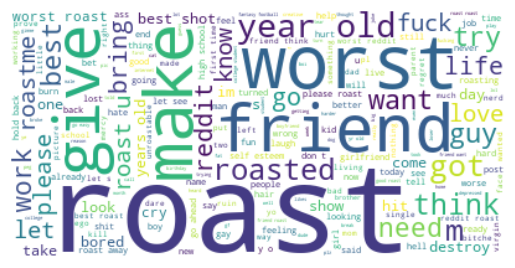

In [37]:
create_wordcloud(title_lower)